# FastDAG2PAG-python Example
This notebook demonstrates how to convert a DAG adjacency matrix with latent variables to a PAG.

In [1]:
import pandas as pd
from fastdag2pag.dag2pag import dag2pag
from fastdag2pag.Random_Graph import ErdosRenyi

## Construct a simple DAG adjacency matrix

In [2]:
num_nodes = 20
expected_degree = 2
ER_graph_gen = ErdosRenyi(num_nodes, expected_degree, def_dataframe=True, seed=321)
graph = ER_graph_gen.get_random_graph()
dag_df = ER_graph_gen.set_latent_nodes(graph, num_latent=3, selection_bias=False)

## Convert DAG to PAG using dag2pag

In [3]:
latent_variables = [node for node in dag_df.columns if node.startswith('L')]
result = dag2pag(dag_df, latent_nodes=latent_variables)
print('PAG Adjacency Matrix:')
print(result['PAG.DataFrame'])

PAG Adjacency Matrix:
     V1  V2  V3  V5  V6  V7  V9  V10  V12  V13  V14  V15  V16  V17  V18  V19  \
V1    0   0   0   0   0   0   0    0    0    0    0    2    0    0    0    2   
V2    0   0   0   0   0   0   0    0    0    0    2    0    2    1    1    2   
V3    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V5    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    2   
V6    0   0   0   0   0   0   0    0    0    0    0    0    2    0    0    2   
V7    0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V9    0   0   0   0   0   0   0    0    0    0    0    0    2    0    0    2   
V10   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
V12   0   0   0   0   0   0   0    0    0    1    2    0    0    0    0    2   
V13   0   0   0   0   0   0   0    0    1    0    2    0    0    0    0    2   
V14   0   1   0   0   0   0   0    0    1    1    0    0    0    0    0    2   
V15   1   0   0   

## View MixGraph object and original DAG MixGraph object

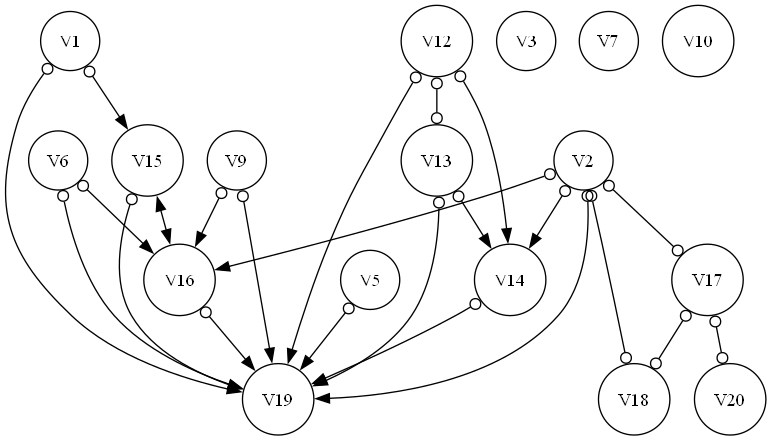

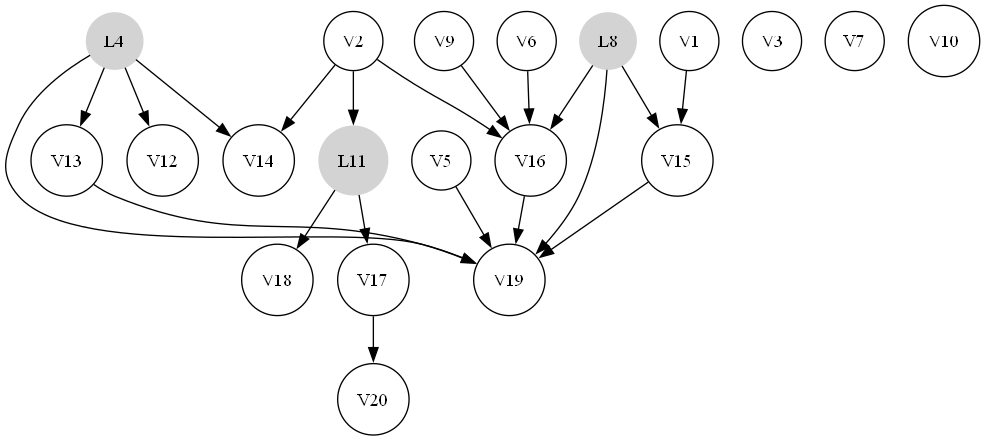

In [4]:
from IPython.display import Image, display

pag = result['PAG.MixGraph']
dag = result['DAG.MixGraph']
pag_pydot = pag.to_pydot()
png_bytes = pag_pydot.create_png()
display(Image(png_bytes))
dag_pydot = dag.to_pydot()
png_bytes = dag_pydot.create_png()
display(Image(png_bytes))